<a href="https://colab.research.google.com/github/LinggarM/Iris-Dataset/blob/main/Iris_Dataset_with_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [45]:
import numpy as np
import pandas as pd

In [9]:
df_iris = pd.read_csv("Iris.csv")
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Simple EDA

In [10]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [94]:
labels = set(df_iris['Species'].tolist())
labels

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [96]:
for i in labels :
  print(i, ": ", df_iris['Species'].tolist().count(i))

Iris-setosa :  50
Iris-versicolor :  50
Iris-virginica :  50


# Get Features & Labels

In [29]:
df_features = df_iris.drop(columns = ['Species', 'Id'])
df_labels = df_iris['Species']

In [30]:
df_features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
df_labels.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [35]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df_scaled = scaler.fit_transform(df_features)

In [47]:
x = np.array(df_features)
y = np.array(df_labels)

# Label Encoding

In [82]:
df_y = pd.get_dummies(y)
y_encoded = np.array(df_y)
y_encoded

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

# Data Splitting

In [83]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size = 0.2, random_state = 42)

# Model Building

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout

model = Sequential()
model.add(Input(shape = x_train[0].shape))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                50        
                                                                 
 dense_18 (Dense)            (None, 15)                165       
                                                                 
 dense_19 (Dense)            (None, 3)                 48        
                                                                 
Total params: 263
Trainable params: 263
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [121]:
history = model.fit(x_train,
          y_train,
          validation_data = (x_test, y_test),
          epochs = 300)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                50        
                                                                 
 dense_15 (Dense)            (None, 15)                165       
                                                                 
 dense_16 (Dense)            (None, 3)                 48        
                                                                 
Total params: 263
Trainable params: 263
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
4/4 [==============================] - 0s 22ms/step - loss: 0.2894 - accuracy: 0.9333 - val_loss: 0.2718 - val_accuracy: 1.0000
Epoch 2/300
4/4 [==============================] - 0s 9ms/step - loss: 0.2863 - accuracy: 0.9417 - val_loss: 0.2661 - val_accuracy: 1.0000
Epoch 3/300
4/4 [=======================

# Evaluation

In [122]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

## Loss Visualization

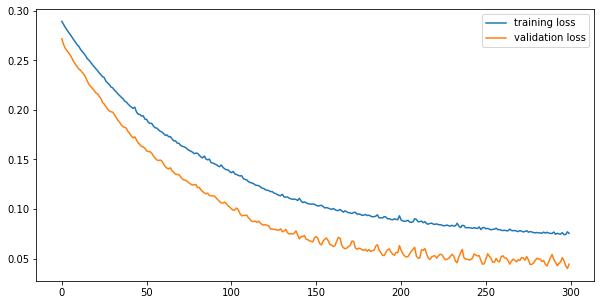

In [123]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['training loss', 'validation loss'])

## Accuracy Visualization

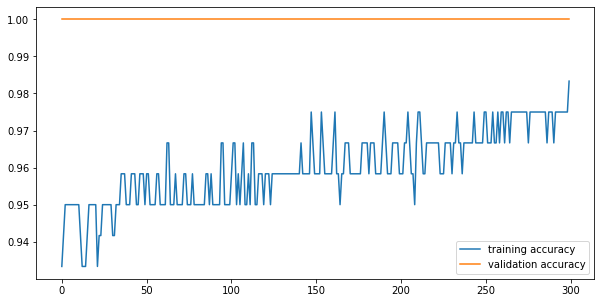

In [124]:
plt.subplots(figsize=(10,5))
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.legend(['training accuracy', 'validation accuracy'])

## Make Prediction

In [131]:
labels

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [144]:
pred = [np.argsort(i) for i in model.predict(x)]
pred = [i[2] for i in pred]
pred = [list(labels)[i] for i in pred]

In [145]:
df_iris['Prediction'] = pred

In [146]:
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Prediction
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica


In [150]:
count = len(df_iris)
true_pred = 0

for i in range(count) :
  if df_iris.iloc[i]['Species'] == df_iris.iloc[i]['Prediction'] :
    true_pred += 1

print("True Prediction: ", true_pred)
print("Accuracy: ", true_pred/count)

True Prediction:  147
Accuracy:  0.98


In [152]:
df_iris.to_csv('Iris_predicted.csv', index = False)